# P66 第一节 描述性统计分析

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import os
os.chdir('E:\云开见明\云开见明Python数据分析师课程数据（仅与云开见明Python数据分析师配套）\第五章')

In [3]:
insuance=pd.read_csv('insurance2.csv')

In [4]:
insuance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
# 均值
insuance['age'].mean()

39.20702541106129

In [6]:
# 标准差
insuance['age'].std()

14.049960379216172

In [7]:
# 中位数
insuance['age'].median()

39.0

In [8]:
# 分位数
insuance['age'].quantile([0,0.05,0.25,0.5,0.75])

0.00    18.0
0.05    18.0
0.25    27.0
0.50    39.0
0.75    51.0
Name: age, dtype: float64

In [9]:
# 众数
insuance['age'].mode()

0    18
dtype: int64

In [10]:
insuance['region'].mode()

0    2
dtype: int64

In [11]:
# 各地区数量
insuance['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

离散程度

In [12]:
# 极差
insuance['age'].max()-insuance['age'].min()

46

In [13]:
# 四分位差
insuance['age'].quantile(0.75)-insuance['age'].quantile(0.25)

24.0

In [14]:
# 方差：标准差的²
insuance['age'].std() * insuance['age'].std()

197.40138665754424

In [15]:
# 变异系数：标准差/均值
insuance['age'].std() / insuance['age'].mean()

0.3583531326824994

区间估计

In [16]:
# 点估计
insuance['charges'].mean()

13270.422265141257

In [17]:
# stats.sem标准误：样本均值的标准差
se=stats.sem(insuance['charges'])

In [18]:
se

331.0674543156824

In [19]:
# 样本数量
n=len(insuance['charges'])

In [20]:
n

1338

In [21]:
# 标准误：标准差/根号下n
insuance['charges'].std() / np.sqrt(n)
# 同stats.sem相同

331.06745431568226

In [22]:
# 区间估计
# 95%的置信度，即95%的情况下落在那个区间范围
interval=stats.norm.interval(0.95,insuance['charges'].mean(),se)

In [23]:
interval

(12621.54197822916, 13919.302552053354)

In [24]:
# 置信度和置信区间  第五章 python统计分析第一节P11
# 90%的样本：u-1.65se—u+1.65se
# 95%的样本：u-1.96se—u+1.96se
# 99%的样本：u-2.58se—u+2.58se
# u:均值

In [25]:
insuance['charges'].mean()-1.96*se

12621.530054682518

In [26]:
insuance['charges'].mean()+1.96*se

13919.314475599995

# P67 假设检验

###### 第五章 python统计分析第二节

In [27]:
insuance['age'].mean()

39.20702541106129

In [28]:
# 假设38岁  

In [29]:
import statsmodels.api as sm

In [30]:
d1 = sm.stats.DescrStatsW(insuance['age'])

In [31]:
d1.ttest_mean(38) #检测38岁

(3.142457193279879, 0.0017121567548687773, 1337.0)

In [32]:
# t值：检验统计量    概率                 自由度：样本量-1

In [33]:
len(insuance['age'])

1338

双样本T检验

In [34]:
creditcard_exp=pd.read_csv('creditcard_exp.csv',skipinitialspace=True) 
#skipinitial:跳过空格

In [35]:
creditcard_exp.dropna(subset=['avg_exp'],inplace=True) #删除缺失值

In [36]:
creditcard_exp.groupby('gender').mean()

,id,Acc,avg_exp,avg_exp_ln,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
gender,,,,,,,,,,,,,
0,48.12,1.0,925.7052,6.717102,29.58,6.034126,0.26,0.0,70.3656,6.641354,924.86,-0.607228,1.74
1,45.90,1.0,1128.5310,6.964500,35.10,10.901155,0.70,0.1,84.9790,11.415768,1264.70,-0.514613,2.40


In [37]:
creditcard_exp.groupby('gender').mean()['avg_exp']

gender
0     925.7052
1    1128.5310
Name: avg_exp, dtype: float64

In [38]:
gender0=creditcard_exp[creditcard_exp['gender']==0]['avg_exp']
gender1=creditcard_exp[creditcard_exp['gender']==1]['avg_exp']

In [39]:
# 方差齐性检验：检验方差是否有显著性差异
leveneTestRes=stats.levene(gender0,gender1)

In [40]:
leveneTestRes

LeveneResult(statistic=0.06833042420735269, pvalue=0.7945734888041385)

In [41]:
# 双样本T检验
#                                     方差是否相等
stats.stats.ttest_ind(gender0,gender1,equal_var=True)

Ttest_indResult(statistic=-1.742901386808629, pvalue=0.08587122878448449)

# P68 卡方检验和方差分析

In [42]:
insuance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [43]:
# crosstab:交叉列表取值
cross_table=pd.crosstab(insuance.children,insuance.insuranceclaim,margins=True)
# margins:是否取总值

In [44]:
cross_table

insuranceclaim,0,1,All
children,,,
0,111,463,574
1,151,173,324
2,146,94,240
3,112,45,157
4,21,4,25
5,14,4,18
All,555,783,1338


In [45]:
# 显著性水平：4.956407582493133e-45
# 小于0.05，拒绝原假设
stats.chi2_contingency(cross_table)

(242.5191362618915,
 4.956407582493133e-45,
 12,
 array([[ 238.0941704 ,  335.9058296 ,  574.        ],
        [ 134.39461883,  189.60538117,  324.        ],
        [  99.55156951,  140.44843049,  240.        ],
        [  65.12331839,   91.87668161,  157.        ],
        [  10.36995516,   14.63004484,   25.        ],
        [   7.46636771,   10.53363229,   18.        ],
        [ 555.        ,  783.        , 1338.        ]]))

In [46]:
pd.crosstab(insuance.children,insuance.insuranceclaim,normalize='index')

insuranceclaim,0,1
children,,
0,0.193380,0.806620
1,0.466049,0.533951
2,0.608333,0.391667
3,0.713376,0.286624
4,0.840000,0.160000
5,0.777778,0.222222


In [47]:
# 不同孩子的数量和索赔有显著性差异

方差分析

In [48]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [49]:
insuance.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [50]:
model=ols('charges ~ C(children)', #charges和children之间的关系，C把children当作分类变量
         data=insuance.dropna()).fit()

In [51]:
anova_lm(model)
# PR:显著性水平

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,2.396917e+09,4.793833e+08,3.29692,0.005786
Residual,1332.0,1.936773e+11,1.454034e+08,NaN,NaN


In [52]:
insuance[['charges','children']].groupby('children').mean()

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


In [53]:
insuance[['charges','region']].groupby('region').mean()

,charges
region,
0,13406.384516
1,12417.575374
2,14735.411438
3,12346.937377


# P69 相关分析

In [54]:
insuance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [56]:
import matplotlib.pyplot as plt

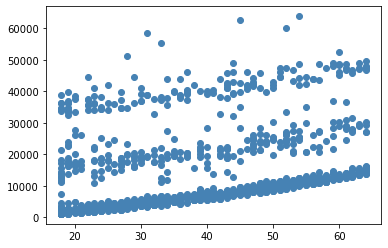

In [58]:
plt.scatter(x=insuance.age,
           y=insuance.charges,
           c='steelblue')
plt.show()

Pearson相关系数

In [59]:
corr_pear=insuance[['age','charges']].corr(method='pearson')

In [60]:
corr_pear.loc['age','charges']

0.299008193330648

Spearman相关系数

In [61]:
corr_spearman=insuance[['age','charges']].corr(method='spearman')

In [62]:
corr_spearman

,age,charges
age,1.000000,0.534392
charges,0.534392,1.000000


In [63]:
corr_spearman.loc['age','charges']

0.534392133771846

Kendall相关系数

In [66]:
corr_kendall=insuance[['age','charges']].corr(method='kendall')

In [67]:
corr_kendall

,age,charges
age,1.000000,0.475302
charges,0.475302,1.000000


In [68]:
corr_kendall.loc['age','charges']

0.47530235429087664

秩和检验

In [74]:
insuance['age_rank']=insuance['age'].rank()
insuance['charges_rank']=insuance['charges'].rank()

In [73]:
insuance[['age','age_rank']]

,age,age_rank
0,19,103.5
1,18,35.0
2,28,376.5
3,33,510.5
4,32,484.5
...,...,...
1333,50,968.0
1334,18,35.0
1335,18,35.0
1336,21,180.5


In [76]:
insuance[['charges','charges_rank']]

,charges,charges_rank
0,16884.92400,1007.0
1,1725.55230,59.0
2,4449.46200,308.0
3,21984.47061,1099.0
4,3866.85520,256.0
...,...,...
1333,10600.54830,748.0
1334,2205.98080,120.0
1335,1629.83350,33.0
1336,2007.94500,93.0


In [79]:
corr_pear_rank=insuance[['age_rank','charges_rank']].corr(method='pearson')
corr_pear_rank
# 与之前的corr_spearman相关系数相同（age，charges)

,age_rank,charges_rank
age_rank,1.000000,0.534392
charges_rank,0.534392,1.000000


In [71]:
insuance['age'].min()

18